In [1]:
from mech_int.tom_utils import *
sns.set()
plt.rcParams['figure.figsize'] = (15, 3)
# import plotly.io
# plotly.io.renderers.default = "png"

In [2]:
tokens = get_tokens(2**13)

# `d_model=512, d_mlp=2048`

In [3]:
model = load_model(d_model=512, d_mlp=2048)
show_attn(model, 9, 11)

creating new model d_model=512 d_mlp=2048 d_head=128 num_layers=1 num_heads=4 output_proj=True mlp_bias=True resid_attn=True resid_mlp=True
00009 + 00011 = 000020 


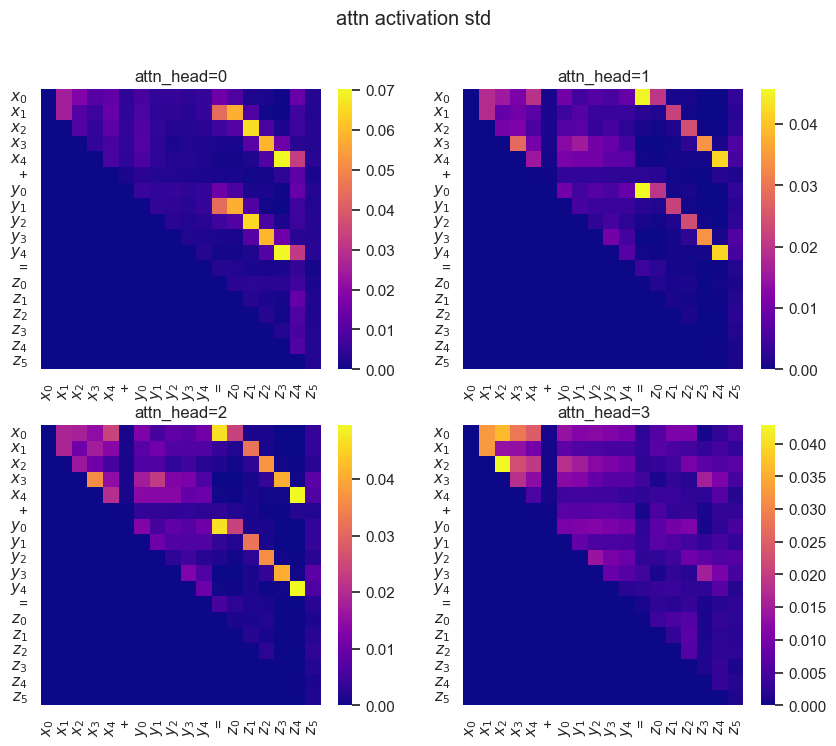

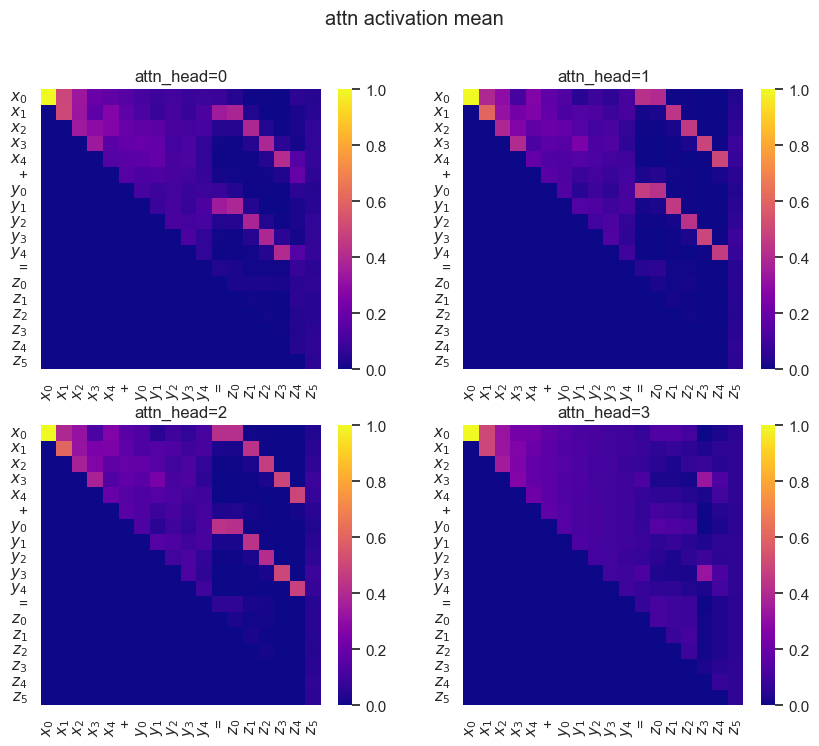

In [4]:
cache = {}
model.cache_all(cache)
with th.inference_mode():
  logits = model(tokens).detach().cpu().to(th.float64)
model.remove_all_hooks()

labels = [f'$x_{i}$' for i in range(5)] + ['+'] + [f'$y_{i}$' for i in range(5)] + ['='] + [f'$z_{i}$' for i in range(6)]
plot_attn(cache['blocks.0.attn.hook_attn'].numpy().std(axis=0), labels=labels, color_palette='plasma', color_center=False, plotly=False, title='attn activation std')
plot_attn(cache['blocks.0.attn.hook_attn'].numpy().mean(axis=0), labels=labels, color_palette='plasma', color_center=False, plotly=False, title='attn activation mean')

In [5]:
remove_attn_head(model, tokens)

initial: accuracy=0.9946 correct=7939/8192 by_digit=[0.99853516 0.99304199 0.99121094 0.98522949 0.99987793 0.99987793]
  some correct examples:                         some wrong examples:     | model answer=
    139̲7̲3 + 051̲3̲4 = 0191̲0̲7                         8̲4̲4̳5̳7̲ + 7̲6̲5̳4̳3̲ = 16̲1̲0̳0̳0̲ | 160̅000
    00035̲ + 64127̲ = 064162̲                         4459̲8 + 4539̲0 = 08998̲8 | 09̅0̅988
    9̲48̲48̲ + 4̲44̲38̲ = 13̲92̲86̲                         09̳1̲04 + 10̳9̲21 = 020̳0̲25 | 01̅0025
    4̲6517̲ + 7̲0076̲ = 11̲6593̲                         009̲7̲1̲ + 648̲7̲9̲ = 0658̲5̲0̲ | 06584̅0
    88̲235̲ + 07̲438̲ = 095̲673̲                         7̲5̲39̳2̲ + 6̲7̲20̳9̲ = 14̲2̲60̳1̲ | 1425̅01

head_0=0: accuracy=0.6587 correct=528/8192 by_digit=[0.94897461 0.53894043 0.4831543  0.49060059 0.49047852 0.99987793]
  some correct examples:                         some wrong examples:     | model answer=
    08̲19̲7 + 38̲24̲2 = 046̲43̲9                         34084 + 42710 = 076794 | 0

# `d_model=256, d_mlp=256`

In [6]:
model = load_model(d_model=256, d_mlp=256)
show_attn(model, 9, 11)

creating new model d_model=256 d_mlp=256 d_head=64 num_layers=1 num_heads=4 output_proj=True mlp_bias=True resid_attn=True resid_mlp=True
00009 + 00011 = 000020 


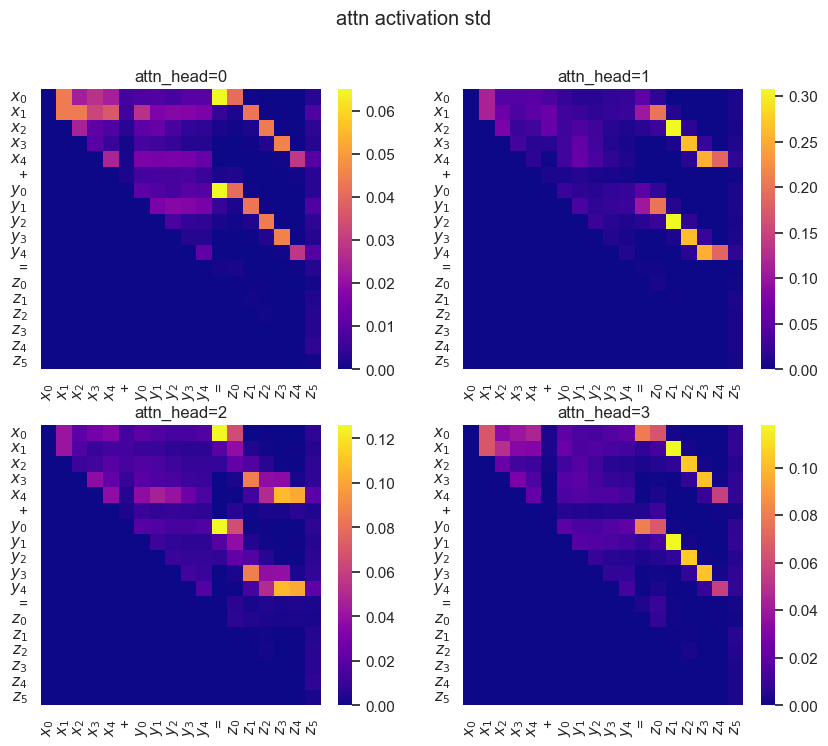

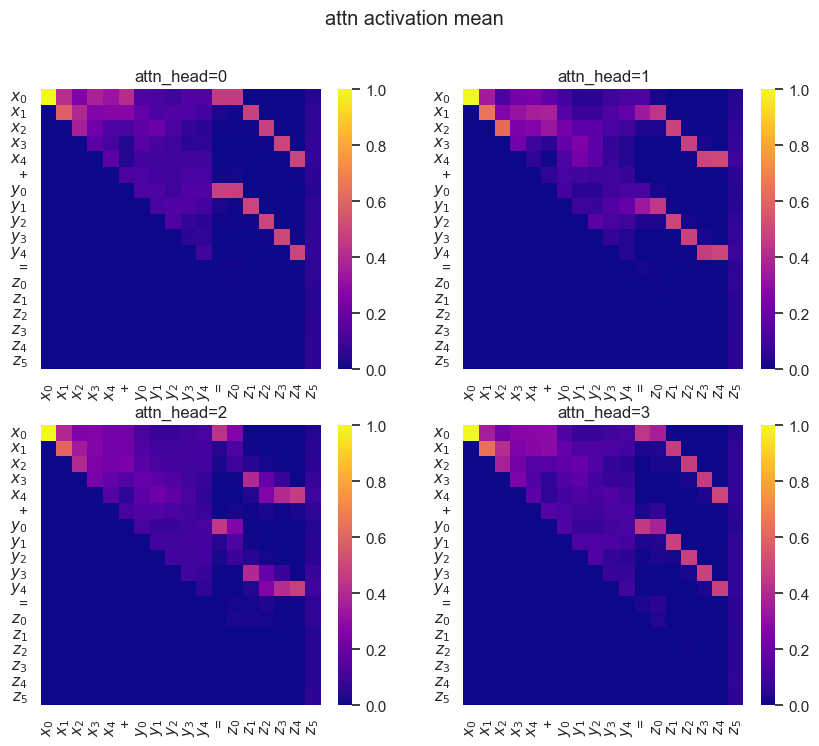

In [7]:
cache = {}
model.cache_all(cache)
with th.inference_mode():
  logits = model(tokens).detach().cpu().to(th.float64)
model.remove_all_hooks()

labels = [f'$x_{i}$' for i in range(5)] + ['+'] + [f'$y_{i}$' for i in range(5)] + ['='] + [f'$z_{i}$' for i in range(6)]
plot_attn(cache['blocks.0.attn.hook_attn'].numpy().std(axis=0), labels=labels, color_palette='plasma', color_center=False, plotly=False, title='attn activation std')
plot_attn(cache['blocks.0.attn.hook_attn'].numpy().mean(axis=0), labels=labels, color_palette='plasma', color_center=False, plotly=False, title='attn activation mean')

In [8]:
remove_attn_head(model, tokens)

initial: accuracy=0.9952 correct=7962/8192 by_digit=[0.99816895 0.98742676 0.99291992 0.99279785 1.         1.        ]
  some correct examples:                         some wrong examples:     | model answer=
    5869̲2 + 1105̲0 = 06974̲2                         9̲0450 + 1̲9510 = 10̲9960 | 11̅9960
    2̲06̲2̳9̲ + 9̲74̲7̳9̲ = 11̲81̲0̳8̲                         1087̲2 + 4907̲4 = 05994̲6 | 06̅9946
    2849̲4 + 5015̲0 = 07864̲4                         9̲5240 + 9̲4651 = 18̲9891 | 19̅9891
    3̲05̳6̲2̲ + 9̲34̳8̲9̲ = 12̲40̳5̲1̲                         35̲7̳5̳8̲ + 16̲2̳4̳5̲ = 052̲0̳0̳3̲ | 051̅003
    19̲024 + 77̲450 = 096̲474                         7̲19̲10 + 8̲15̲89 = 15̲34̲99 | 1535̅99

head_0=0: accuracy=0.3347 correct=4/8192 by_digit=[0.88012695 0.24230957 0.18347168 0.19250488 0.16687012 0.34289551]
  some correct examples:                         some wrong examples:     | model answer=
    4̲0627 + 8̲5162 = 12̲5789                         39̲130 + 12̲264 = 051̲394 | 08̅8̅7̅5̅3̅
    421

# `d_model=128, d_mlp=64`

In [9]:
model = load_model(d_model=128, d_mlp=64)
show_attn(model, 9, 11)

creating new model d_model=128 d_mlp=64 d_head=32 num_layers=1 num_heads=4 output_proj=True mlp_bias=True resid_attn=True resid_mlp=True
00009 + 00011 = 000020 | 000010


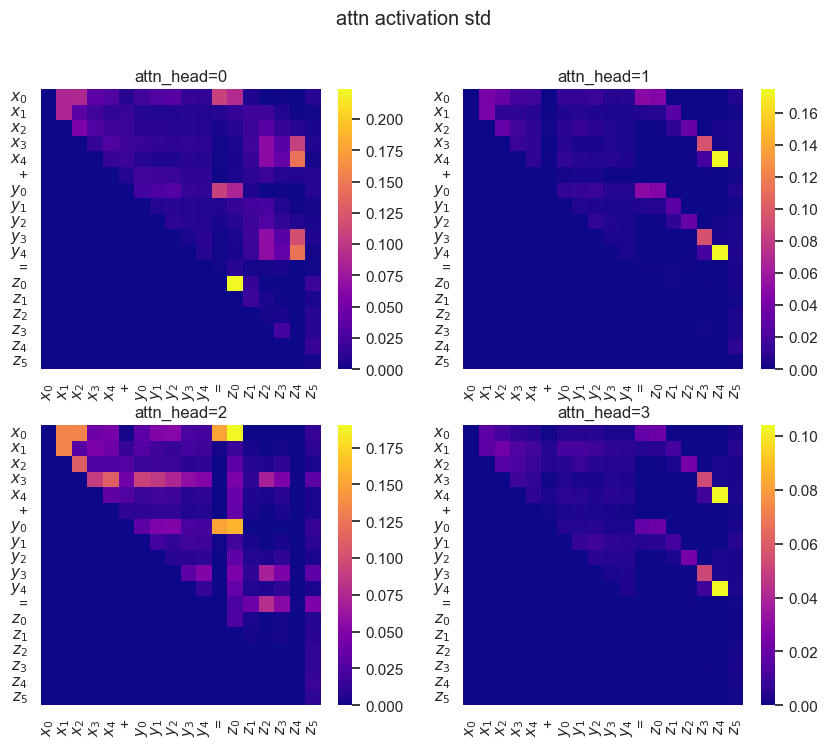

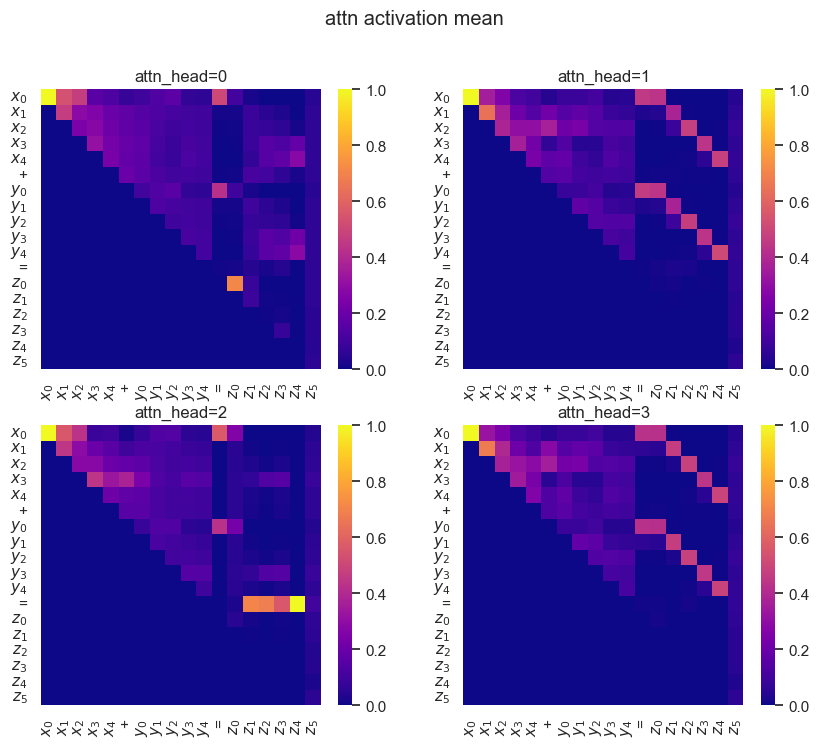

In [10]:
cache = {}
model.cache_all(cache)
with th.inference_mode():
  logits = model(tokens).detach().cpu().to(th.float64)
model.remove_all_hooks()

labels = [f'$x_{i}$' for i in range(5)] + ['+'] + [f'$y_{i}$' for i in range(5)] + ['='] + [f'$z_{i}$' for i in range(6)]
plot_attn(cache['blocks.0.attn.hook_attn'].numpy().std(axis=0), labels=labels, color_palette='plasma', color_center=False, plotly=False, title='attn activation std')
plot_attn(cache['blocks.0.attn.hook_attn'].numpy().mean(axis=0), labels=labels, color_palette='plasma', color_center=False, plotly=False, title='attn activation mean')

In [11]:
remove_attn_head(model, tokens)

initial: accuracy=0.9792 correct=7219/8192 by_digit=[0.9967041  0.96057129 0.96374512 0.96679688 0.98718262 1.        ]
  some correct examples:                         some wrong examples:     | model answer=
    367̲48̲ + 228̲24̲ = 0595̲72̲                         58̲320 + 22̲042 = 080̲362 | 07̅0362
    3̲36̲9̲0 + 8̲16̲2̲6 = 11̲53̲1̲6                         21̲154̲ + 59̲709̲ = 080̲863̲ | 07̅0863
    62036 + 01802 = 063838                         7̲5̳8̲33̲ + 8̲4̳3̲59̲ = 16̲0̳1̲92̲ | 15̅0192
    41210 + 41436 = 082646                         73̲34̳3̲ + 07̲25̳9̲ = 080̲60̳2̲ | 0805̅02
    8̲53̲6̲8̲ + 7̲28̲9̲7̲ = 15̲82̲6̲5̲                         20̳4̲9̲2 + 39̳9̲8̲7 = 060̳4̲7̲9 | 05̅0479

head_0=0: accuracy=0.5427 correct=100/8192 by_digit=[0.89428711 0.21618652 0.52905273 0.5045166  0.53308105 0.57897949]
  some correct examples:                         some wrong examples:     | model answer=
    8̲5419̲ + 8̲3063̲ = 16̲8482̲                         3̲6̲34̲8̲ + 9̲7̲17̲9̲ = 13̲3̲52̲7̲ |

# `d_model=64, d_mlp=128`

In [12]:
model = load_model(d_model=64, d_mlp=128)
show_attn(model, 9, 11)

creating new model d_model=64 d_mlp=128 d_head=16 num_layers=1 num_heads=4 output_proj=True mlp_bias=True resid_attn=True resid_mlp=True
00009 + 00011 = 000020 


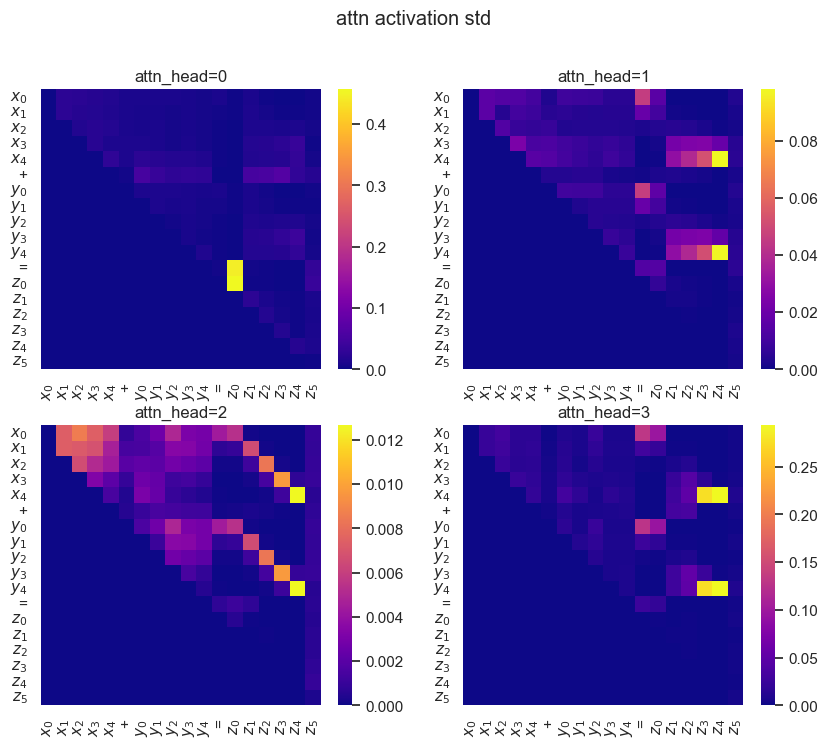

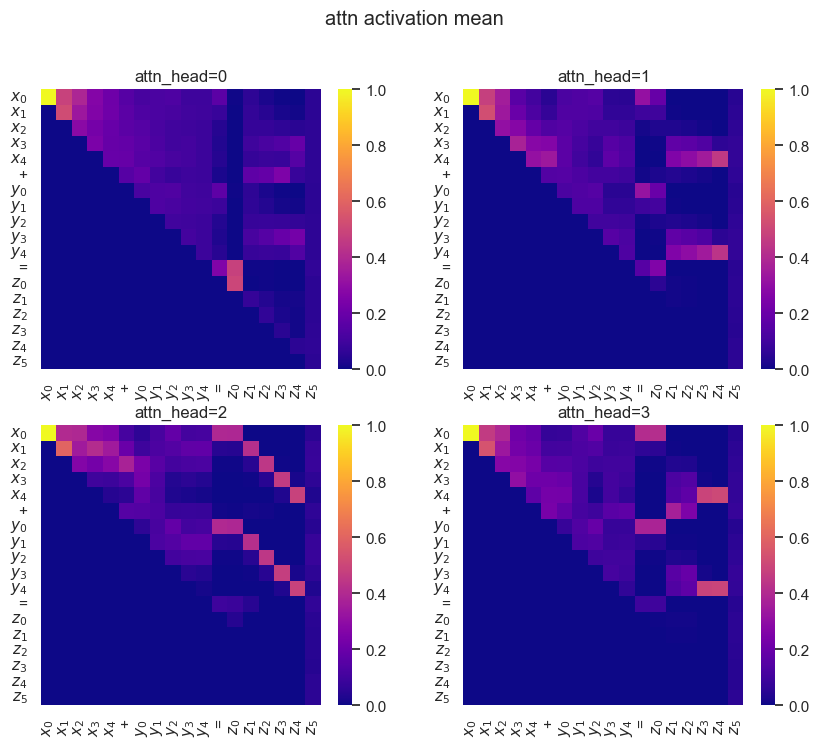

In [13]:
cache = {}
model.cache_all(cache)
with th.inference_mode():
  logits = model(tokens).detach().cpu().to(th.float64)
model.remove_all_hooks()

labels = [f'$x_{i}$' for i in range(5)] + ['+'] + [f'$y_{i}$' for i in range(5)] + ['='] + [f'$z_{i}$' for i in range(6)]
plot_attn(cache['blocks.0.attn.hook_attn'].numpy().std(axis=0), labels=labels, color_palette='plasma', color_center=False, plotly=False, title='attn activation std')
plot_attn(cache['blocks.0.attn.hook_attn'].numpy().mean(axis=0), labels=labels, color_palette='plasma', color_center=False, plotly=False, title='attn activation mean')

In [14]:
remove_attn_head(model, tokens)

initial: accuracy=0.9829 correct=7390/8192 by_digit=[0.99633789 0.97473145 0.96411133 0.97253418 0.98962402 1.        ]
  some correct examples:                         some wrong examples:     | model answer=
    50̳8̲21 + 09̳6̲55 = 060̳4̲76                         3̲4̳5̳9̲9 + 7̲5̳4̳6̲0 = 11̲0̳0̳5̲9 | 10̅0059
    04̲04̳7̲ + 07̲45̳6̲ = 011̲50̳3̲                         23̳5̲40 + 66̳6̲55 = 090̳1̲95 | 08̅0195
    17441 + 82110 = 099551                         11̳8̲7̳7̲ + 08̳4̲2̳3̲ = 020̳3̲0̳0̲ | 01̅02̅00
    53̲7̲8̲4̲ + 17̲8̲8̲7̲ = 071̲6̲7̲1̲                         3̲1̳4̳5̳8̲ + 7̲8̳5̳4̳3̲ = 11̲0̳0̳0̳1̲ | 10̅0001
    2̲05̲36̲ + 9̲09̲47̲ = 11̲14̲83̲                         7048̲5̲ + 0805̲5̲ = 07854̲0̲ | 07853̅0

head_0=0: accuracy=0.6601 correct=13/8192 by_digit=[0.88806152 0.01074219 0.77355957 0.7565918  0.76940918 0.76245117]
  some correct examples:                         some wrong examples:     | model answer=
    0157̲2̲ + 0336̲8̲ = 00494̲0̲                         5̲1̳6̲22 + 5̲8̳

# `d_model=64, d_mlp=64`

In [15]:
model = load_model(d_model=64, d_mlp=64)
show_attn(model, 9, 11)

creating new model d_model=64 d_mlp=64 d_head=16 num_layers=1 num_heads=4 output_proj=True mlp_bias=True resid_attn=True resid_mlp=True
00009 + 00011 = 000020 


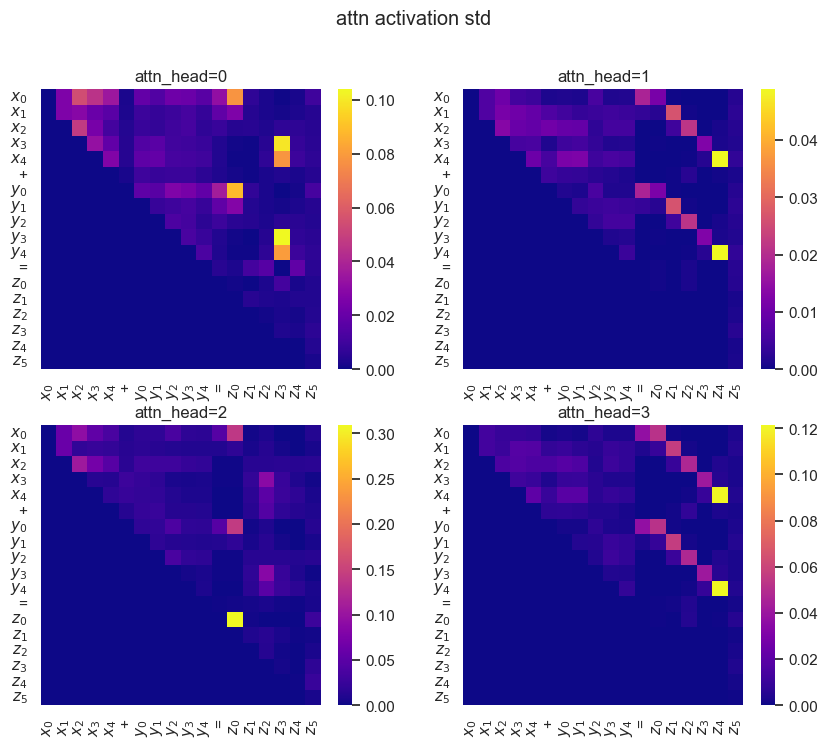

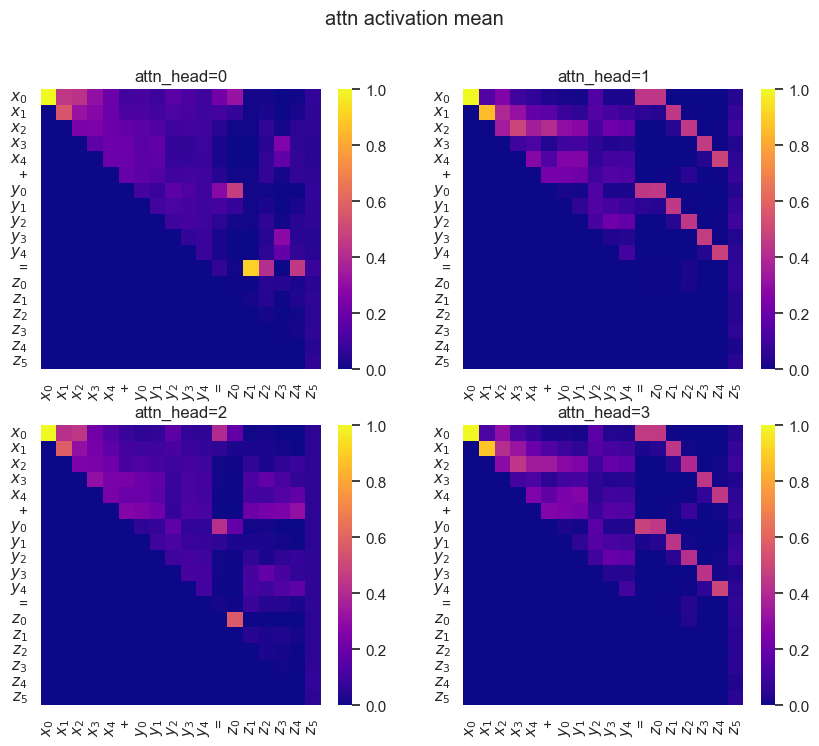

In [16]:
cache = {}
model.cache_all(cache)
with th.inference_mode():
  logits = model(tokens).detach().cpu().to(th.float64)
model.remove_all_hooks()

labels = [f'$x_{i}$' for i in range(5)] + ['+'] + [f'$y_{i}$' for i in range(5)] + ['='] + [f'$z_{i}$' for i in range(6)]
plot_attn(cache['blocks.0.attn.hook_attn'].numpy().std(axis=0), labels=labels, color_palette='plasma', color_center=False, plotly=False, title='attn activation std')
plot_attn(cache['blocks.0.attn.hook_attn'].numpy().mean(axis=0), labels=labels, color_palette='plasma', color_center=False, plotly=False, title='attn activation mean')

In [17]:
remove_attn_head(model, tokens)

initial: accuracy=0.9758 correct=7083/8192 by_digit=[0.99633789 0.97192383 0.95861816 0.94360352 0.98449707 1.        ]
  some correct examples:                         some wrong examples:     | model answer=
    2̲0̳6̲8̲9 + 8̲9̳9̲7̲0 = 11̲0̳6̲5̲9                         39̲024 + 16̲172 = 055̲196 | 0552̅96
    9̲7106 + 1̲2713 = 10̲9819                         2̲11̳5̲4̲ + 9̲28̳5̲9̲ = 11̲40̳1̲3̲ | 1149̅13
    7̳6̲632 + 2̳6̲214 = 10̳2̲846                         9̲7̲410 + 2̲6̲386 = 12̲3̲796 | 1238̅96
    70623̲ + 05049̲ = 075672̲                         35̲072 + 16̲011 = 051̲083 | 0511̅83
    7̲6̲1̳8̲8̲ + 4̲7̲8̳8̲5̲ = 12̲4̲0̳7̲3̲                         9̲5240 + 9̲4651 = 18̲9891 | 19̅9891

head_0=0: accuracy=0.4129 correct=18/8192 by_digit=[0.9543457  0.20483398 0.24438477 0.40136719 0.26269531 0.40979004]
  some correct examples:                         some wrong examples:     | model answer=
    07̲8̲7̲5̲ + 13̲9̲4̲8̲ = 021̲8̲2̲3̲                         9̲6̳5̲61 + 6̲3̳8̲21 = 16̲0̳3̲82